# Parabolic approximations to free energies of Fe-Cr system

We gotts find $a(T),b(T),c(T)$ (for each phase) such that

$$G(X_{Cr},T) = a(T)X_{Cr}^2 + b(T)X_{Cr} +c(T)$$

is a good approximation to the free energies

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

First, let's define the actual form of free nergies as given in the Andersson-Sundman paper

In [24]:
# Define standard gibbs energies of components

R = 8.31448

def G0_Cr_bcc(T):
    
    # -439.0 to account for difference in standard enthalpies
    
    return (T<2180)*(-439.0 -8851.93 + 157.48*T -26.908*T*np.log(T) + 1.89435E-3 * T**2 -1.47721E-6*T**3 + 139250/T) +\
    (T>=2180)*(-34864+344.18*T-50*T*np.log(T)-2.88526E32/T**9)

def G0_Fe_bcc(T):
    
    return (T<1811)*(1224.83 + 124.134*T - 23.5143*T*np.log(T) -4.3975E-3 * T**2 - 5.89269E-8*T**3 + 77358.5/T) +\
    (T>=1811)*(-25384.451+299.31255*T -46*T*np.log(T) +2.2960305E31/T**9)


def G0_Fe_liq(T):
    
    return (T<1811)*(G0_Fe_bcc(T) + 12040.17 - 6.55843*T - 3.6751551E-21*T**7) +\
    (T>=1811)*(-10839.7+291.302*T-46*T*np.log(T))

def G0_Cr_liq(T):
    
    return (T<2180)*(G0_Cr_bcc(T) + 24335.93 - 11.42*T + 2.37615E-21*T**7) +\
    (T>=2180)*(-16459+335.618*T-50*T*np.log(T))


# Excess terms

def Gxs_bcc(x,T):
    
    return x*(1-x)*(20500-9.68*T)

def Gxs_liq(x,T):
    
    return x*(1-x)*(-14550+6.65*T)

# Magnetic Term

def GM(x,T):
    
    Tc = 1043*(1-x) - 311.5*x + x*(1-x)*(1650+550*(2*x-1))
    t = T/Tc
    b = 2.22*(1-x) - 0.008*x -x*(1-x)*0.85
    
    # different equations for t>1 and t<1
        
    f = (t>1)*(-6.417E-2/t**5 - 2.037E-3/t**15 -4.278E-4/t**25) +\
    (t<=1)*(-0.90530/t +1.0 + 0.153*t**3 - 6.8E-3*t**9 - 1.53E-3*t**15)

    
    return R*T*np.log(b+1)*f

In [25]:
# Calculate Free energies

def G_bcc(x,T):
    
    return x*G0_Cr_bcc(T) + (1-x)*G0_Fe_bcc(T) + R*T*(x*np.log(x)+(1-x)*np.log(1-x))+ Gxs_bcc(x,T) + GM(x,T)

def G_liq(x,T):
    
    return x*G0_Cr_liq(T) + (1-x)*G0_Fe_liq(T) + R*T*(x*np.log(x)+(1-x)*np.log(1-x)) + Gxs_liq(x,T)

Now for the parabolic approximations

In [4]:
table_bcc = []
table_liq = []
Temps = np.linspace(1750,1900,1510)
xs = np.linspace(0.05,0.55,200)

for T in Temps:
    
    g_bcc = G_bcc(xs,T)
    g_liq = G_liq(xs,T)
    
    # Calculate coefficients
    coeffs_bcc = np.polyfit(xs,g_bcc,2)
    coeffs_liq = np.polyfit(xs,g_liq,2)
    
    # Append results
    bcc_entry = np.hstack((T,coeffs_bcc))
    liq_entry = np.hstack((T,coeffs_liq))
    
    table_bcc.append(bcc_entry)
    table_liq.append(liq_entry)

In [5]:
table_bcc = np.array(table_bcc)
table_liq = np.array(table_liq)

Now, for some plots

### BCC

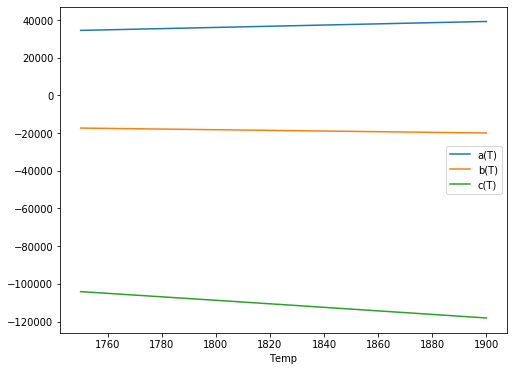

In [6]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(table_bcc[:,0],table_bcc[:,1],label='a(T)')
ax.plot(table_bcc[:,0],table_bcc[:,2],label='b(T)')
ax.plot(table_bcc[:,0],table_bcc[:,3],label='c(T)')
ax.set_xlabel('Temp')
ax.legend()

In [21]:
degree = 1

a_bcc = np.polyfit(table_bcc[:,0],table_bcc[:,1],degree)
b_bcc = np.polyfit(table_bcc[:,0],table_bcc[:,2],degree)
c_bcc = np.polyfit(table_bcc[:,0],table_bcc[:,3],degree)

# quadratic fit

a_bcc_2 = np.polyfit(table_bcc[:,0],table_bcc[:,1],2)
b_bcc_2 = np.polyfit(table_bcc[:,0],table_bcc[:,2],2)
c_bcc_2 = np.polyfit(table_bcc[:,0],table_bcc[:,3],2)

print(a_bcc,b_bcc,c_bcc)
print(a_bcc_2,b_bcc_2,c_bcc_2)

[    31.61355283 -20810.14863321] [  -17.49785268 13306.46515713] [  -93.30408886 59211.14860004]
[-1.86992636e-04  3.22960760e+01 -2.14325999e+04] [-1.83817494e-03 -1.07885141e+01  7.18764488e+03] [-1.14505617e-02 -5.15095388e+01  2.10951199e+04]


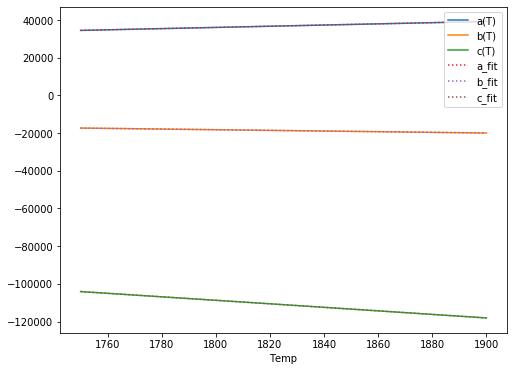

In [8]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(table_bcc[:,0],table_bcc[:,1],label='a(T)')
ax.plot(table_bcc[:,0],table_bcc[:,2],label='b(T)')
ax.plot(table_bcc[:,0],table_bcc[:,3],label='c(T)')
ax.plot(table_bcc[:,0],np.polyval(a_bcc,table_bcc[:,0]),label='a_fit',linestyle=':')
ax.plot(table_bcc[:,0],np.polyval(b_bcc,table_bcc[:,0]),label='b_fit',linestyle=':')
ax.plot(table_bcc[:,0],np.polyval(c_bcc,table_bcc[:,0]),label='c_fit',linestyle=':')
ax.set_xlabel('Temp')
ax.legend()

## Liquid

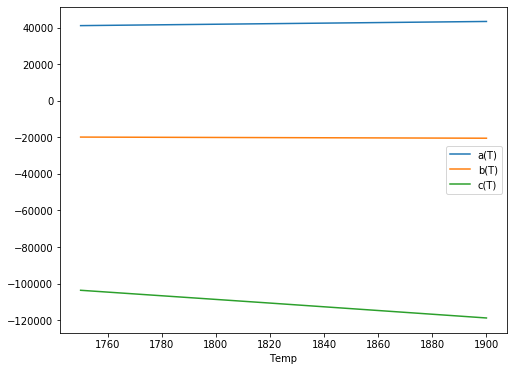

In [9]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(table_liq[:,0],table_liq[:,1],label='a(T)')
ax.plot(table_liq[:,0],table_liq[:,2],label='b(T)')
ax.plot(table_liq[:,0],table_liq[:,3],label='c(T)')
ax.set_xlabel('Temp')
ax.legend()

In [10]:
a_liq = np.polyfit(table_liq[:,0],table_liq[:,1],degree)
b_liq = np.polyfit(table_liq[:,0],table_liq[:,2],degree)
c_liq = np.polyfit(table_liq[:,0],table_liq[:,3],degree)

print(a_liq,b_liq,c_liq)

[   15.14757485 14550.        ] [-4.12722263e+00 -1.26632136e+04] [ -100.96091032 73077.01020094]


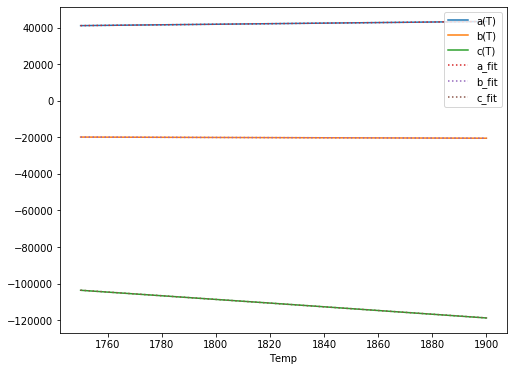

In [11]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(table_liq[:,0],table_liq[:,1],label='a(T)')
ax.plot(table_liq[:,0],table_liq[:,2],label='b(T)')
ax.plot(table_liq[:,0],table_liq[:,3],label='c(T)')
ax.plot(table_liq[:,0],np.polyval(a_liq,table_liq[:,0]),label='a_fit',linestyle=':')
ax.plot(table_liq[:,0],np.polyval(b_liq,table_liq[:,0]),label='b_fit',linestyle=':')
ax.plot(table_liq[:,0],np.polyval(c_liq,table_liq[:,0]),label='c_fit',linestyle=':')
ax.set_xlabel('Temp')
ax.legend()

## Comparision with actual free energies

Alright, lets compare with the actual free energies

In [22]:
def G_bcc_appx(x,T):
    
    return np.polyval(a_bcc,T)*x**2 + np.polyval(b_bcc,T)*x + np.polyval(c_bcc,T)

# quadratic

def G_bcc_appx_2(x,T):
    
    return np.polyval(a_bcc_2,T)*x**2 + np.polyval(b_bcc_2,T)*x + np.polyval(c_bcc_2,T)

def G_liq_appx(x,T):
    
    return np.polyval(a_liq,T)*x**2 + np.polyval(b_liq,T)*x + np.polyval(c_liq,T)

In [13]:
%matplotlib inline
# Plots

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [23]:
@interact(T=(1750,1900,10))
def plotfn(T):
    fig,ax = plt.subplots(figsize=(10,8))

    ax.plot(xs,G_bcc(xs,T),label='BCC')
    ax.plot(xs,G_liq(xs,T),label='liq')
    ax.plot(xs,G_bcc_appx(xs,T),label='BCC',linestyle='--')
    ax.plot(xs,G_bcc_appx_2(xs,T),label='BCC_2',linestyle='--')
    ax.plot(xs,G_liq_appx(xs,T),label='liq',linestyle='--')
    ax.legend()

interactive(children=(IntSlider(value=1820, description='T', max=1900, min=1750, step=10), Output()), _dom_cla…

## Cubic spline approximation

Let's see if a cubic spline for a,b,c has a better result

In [15]:
import scipy.interpolate as interp

In [16]:
# BCC
a_bcc_cs = interp.CubicSpline(table_bcc[:,0],table_bcc[:,1])
b_bcc_cs = interp.CubicSpline(table_bcc[:,0],table_bcc[:,2])
c_bcc_cs = interp.CubicSpline(table_bcc[:,0],table_bcc[:,3])

In [17]:
# Liquid
a_liq_cs = interp.CubicSpline(table_liq[:,0],table_liq[:,1])
b_liq_cs = interp.CubicSpline(table_liq[:,0],table_liq[:,2])
c_liq_cs = interp.CubicSpline(table_liq[:,0],table_liq[:,3])

In [18]:
def G_bcc_cs(x,T):
    
    return a_bcc_cs(T)*x**2 + b_bcc_cs(T)*x + c_bcc_cs(T)

def G_liq_cs(x,T):
    
    return a_liq_cs(T)*x**2 + b_liq_cs(T)*x + c_liq_cs(T)

In [19]:
@interact(T=(1750,1900,10))
def plotfn(T):
    fig,ax = plt.subplots(figsize=(10,8))

    ax.plot(xs,G_bcc(xs,T),label='BCC')
    ax.plot(xs,G_liq(xs,T),label='liq')
    ax.plot(xs,G_bcc_cs(xs,T),label='BCC_cs',linestyle='--')
    ax.plot(xs,G_liq_cs(xs,T),label='liq_cs',linestyle='--')
    ax.legend()

interactive(children=(IntSlider(value=1820, description='T', max=1900, min=1750, step=10), Output()), _dom_cla…